In [1]:
#Step 1: IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
#Step 2a: IMPORTING & ANALYSING DATA
ERP = pd.read_excel(r"C:\Users\caspe\OneDrive\Documenten\OpenClassroom\Project 5\erp.xlsx")

In [3]:
ERP.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
ERP.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [5]:
ERP.shape

(825, 5)

In [6]:
ERP.describe(include="all")

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.000000,825.000000,825.000000,825.000000,825
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,638
mean,5162.597576,0.869091,32.415636,26.496970,NaN
std,902.644635,0.337506,26.795849,45.892422,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN


In [7]:
ERP.isnull().values.any()

False

In [8]:
#Step 2b: IMPORTING & ANALYSING DATA
web_data = pd.read_excel(r"C:\Users\caspe\OneDrive\Documenten\OpenClassroom\Project 5\web.xlsx")

In [9]:
web_data.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [10]:
web_data.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [11]:
web_data.shape

(1513, 28)

In [12]:
len(web_data["sku"].unique())

715

In [13]:
web_data.describe(include='all')

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428.0,1513.0,1513.0,1513.0,1430.0,1430.000000,716,0.0,1430.000000,1430,...,1430,1430,1430,0.0,1430.0,1430,1430.0,1430,714,1430.0
unique,714.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,716,...,716,589,589,NaN,NaN,1430,NaN,2,1,NaN
top,14332.0,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,2019-03-28 15:10:42,...,thevenet-quintaine-vire-clesse-emilian-gillet-...,2020-08-26 15:55:03,2020-08-26 13:55:03,NaN,NaN,https://www.bottle-neck.fr/wp-content/uploads/...,NaN,product,image/jpeg,NaN
freq,2.0,NaN,NaN,NaN,NaN,NaN,716,NaN,NaN,2,...,2,14,14,NaN,NaN,1,NaN,716,714,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-08 12:58:52,...,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-20 11:00:00,...,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.006993,NaN,NaN,1.998601,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
std,NaN,0.0,0.0,0.0,0.0,8.510559,NaN,NaN,0.037385,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0


In [14]:
web_data_nodups = web_data.drop_duplicates(subset=['sku'], keep='first')
web_data_nodups.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [15]:
web_data_nodups.shape

(715, 28)

In [16]:
web_data.loc[(web_data['sku'].isna()) & (web_data['tax_status'].notna())]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [17]:
#Step 2c: IMPORTING & ANALYSING DATA
link = pd.read_excel(r"C:\Users\caspe\OneDrive\Documenten\OpenClassroom\Project 5\liaison.xlsx")

In [18]:
link.rename(columns={'id_web': 'sku'}, inplace=True)
link.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [19]:
link.dtypes

product_id     int64
sku           object
dtype: object

In [20]:
link.shape

(825, 2)

In [21]:
link.isnull().sum().sum()

91

In [22]:
#step 3a: removing unnecessary columns
rel_web_data = web_data_nodups[['sku','total_sales', 'post_name']]

In [23]:
rel_web_data.head()

,sku,total_sales,post_name
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
4,19814,3.0,pierre-jean-villa-igp-gamine-2018


In [24]:
rel_web_data.shape

(715, 3)

In [25]:
#step 3b: remove NaN from link dataframe

In [26]:
sku_nan = link[link['sku'].isnull()]
sku_nan

,product_id,sku
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [27]:
link_nonan = link.dropna()
link_nonan

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


In [28]:
#step 4: merging the dataframes
link_erp = link_nonan.merge(ERP, on='product_id', how='left')
link_erp

,product_id,sku,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock
...,...,...,...,...,...,...
729,7023,15891,1,27.5,15,instock
730,7025,15887,1,69.0,2,instock
731,7247,13127-1,1,54.8,23,instock
732,7329,14680-1,0,26.5,14,instock


In [29]:
link_erp.shape

(734, 6)

In [30]:
erp_web = link_erp.merge(rel_web_data, on='sku', how='inner')
erp_web.head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status,total_sales,post_name
0,3847,15298,1,24.2,0,outofstock,6.0,pierre-jean-villa-saint-joseph-preface-2018
1,3849,15296,1,34.3,0,outofstock,0.0,pierre-jean-villa-saint-joseph-tilde-2017
2,3850,15300,1,20.8,0,outofstock,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
3,4032,19814,1,14.1,0,outofstock,3.0,pierre-jean-villa-igp-gamine-2018
4,4039,19815,1,46.0,0,outofstock,0.0,pierre-jean-villa-cote-rotie-carmina-2017


In [31]:
erp_web.describe()

,product_id,onsale_web,price,stock_quantity,total_sales
count,714.000000,714.0,714.000000,714.000000,714.000000
mean,5032.557423,1.0,32.493137,28.746499,4.012605
std,790.510878,0.0,27.810525,48.012608,8.518183
min,3847.000000,1.0,5.200000,0.000000,0.000000
25%,4280.250000,1.0,14.100000,2.000000,0.000000
50%,4796.000000,1.0,23.550000,12.000000,1.000000
75%,5710.500000,1.0,42.175000,35.000000,4.000000
max,7338.000000,1.0,225.000000,578.000000,96.000000


In [32]:
residual_prod = sku_nan.merge(ERP, on='product_id', how='left')
residual_prod

,product_id,sku,onsale_web,price,stock_quantity,stock_status
0,4055,NaN,0,86.1,0,outofstock
1,4090,NaN,0,73.0,0,outofstock
2,4092,NaN,0,47.0,0,outofstock
3,4195,NaN,0,14.1,0,outofstock
4,4209,NaN,0,73.5,0,outofstock
...,...,...,...,...,...,...
86,7196,NaN,0,31.0,55,instock
87,7200,NaN,0,31.0,6,instock
88,7201,NaN,0,31.0,18,instock
89,7203,NaN,0,45.0,30,instock


In [33]:
residual_prod["onsale_web"].unique()

array([0, 1], dtype=int64)

In [34]:
residual_prod.loc[residual_prod["onsale_web"] == 1]

,product_id,sku,onsale_web,price,stock_quantity,stock_status
11,4594,NaN,1,144.0,0,outofstock
28,5070,NaN,1,84.7,0,outofstock
29,5075,NaN,1,43.3,0,outofstock


In [35]:
#Step 5a: Calculating CA/produit
erp_web['CA'] = erp_web['price'] * erp_web['total_sales']
erp_web

,product_id,sku,onsale_web,price,stock_quantity,stock_status,total_sales,post_name,CA
0,3847,15298,1,24.2,0,outofstock,6.0,pierre-jean-villa-saint-joseph-preface-2018,145.2
1,3849,15296,1,34.3,0,outofstock,0.0,pierre-jean-villa-saint-joseph-tilde-2017,0.0
2,3850,15300,1,20.8,0,outofstock,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,0.0
3,4032,19814,1,14.1,0,outofstock,3.0,pierre-jean-villa-igp-gamine-2018,42.3
4,4039,19815,1,46.0,0,outofstock,0.0,pierre-jean-villa-cote-rotie-carmina-2017,0.0
...,...,...,...,...,...,...,...,...,...
709,6930,16135,1,8.4,83,instock,5.0,mouthes-le-bihan-aime-chai-2015,42.0
710,7023,15891,1,27.5,15,instock,0.0,camin-larredya-jurancon-sec-la-virada-2018,0.0
711,7025,15887,1,69.0,2,instock,0.0,jamet-cote-rotie-fructus-voluptas-2018,0.0
712,7247,13127-1,1,54.8,23,instock,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,0.0


In [36]:
#Step 5b: calculating CA Total (en ligne)
erp_web['CA'].sum()

70568.6

In [37]:
#Step 6: Price check

{'whiskers': [<matplotlib.lines.Line2D at 0x1f6fcb44f88>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6fcb4fc08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6fcb44848>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6fcb4fdc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6fcb55e88>],
 'means': []}

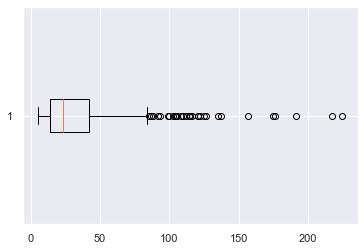

In [38]:
plt.boxplot(erp_web['price'], vert=False)

In [46]:
sorted_price = erp_web.sort_values(by=['price'])
q1, q3 = np.percentile(sorted_price["price"],[25,75])
iqr = q3 - q1
print("Q1 => " + str(q1))
print("Q3 => " + str(q3))
print("IQR => " + str(iqr))
upper_bound = q3 +(1.5 * iqr)
print("Upper_bound => " + str(upper_bound))
result = sorted_price[(sorted_price["price"] > upper_bound) | (sorted_price["price"] < lower_bound)]
print("Outliers => " + str(len(result)))
result['price']

Q1 => 14.1
Q3 => 42.175000000000004
IQR => 28.075000000000003
Upper_bound => 84.28750000000001
Outliers => 32


205     85.6
438     86.8
65      88.4
502     92.0
602     93.0
655     99.0
63     100.0
380    102.3
222    104.0
432    105.0
431    105.0
647    105.6
219    108.5
227    109.6
437    112.0
604    114.0
656    115.0
653    115.0
648    116.4
657    121.0
654    121.0
603    122.0
511    124.8
201    126.5
642    135.0
381    137.0
221    157.0
553    175.0
218    176.0
587    191.3
426    217.5
199    225.0
Name: price, dtype: float64

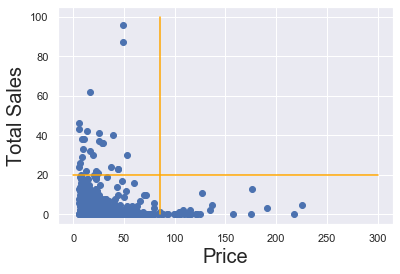

In [40]:
x = erp_web['price']
y = erp_web['total_sales']
plt.scatter(x,y)
plt.ylabel('Total Sales',fontsize=20)
plt.xlabel('Price',fontsize=20)
plt.plot([0, 300], [20, 20], c='orange')
plt.plot([85.6, 85.6], [0, 100], c='orange')
plt.show()

In [41]:
erp_web_nonull_sales= erp_web[erp_web['total_sales'] != 0]
erp_web_nonull_sales

,product_id,sku,onsale_web,price,stock_quantity,stock_status,total_sales,post_name,CA
0,3847,15298,1,24.2,0,outofstock,6.0,pierre-jean-villa-saint-joseph-preface-2018,145.2
3,4032,19814,1,14.1,0,outofstock,3.0,pierre-jean-villa-igp-gamine-2018,42.3
7,4042,16042,1,31.2,34,instock,7.0,pierre-gaillard-cornas-2017,218.4
8,4043,14980,1,60.0,12,instock,3.0,pierre-gaillard-cote-rotie-esprit-blond-2017,180.0
9,4045,16041,1,42.6,66,instock,14.0,pierre-gaillard-cote-rotie-2018,596.4
...,...,...,...,...,...,...,...,...,...
698,6665,16068,1,27.7,8,instock,1.0,domaine-hauvette-igp-alpilles-jaspe-2017,27.7
700,6738,8193,1,15.4,40,instock,3.0,emile-boeckel-cremant-chardonnay-extra-brut-2016,46.2
707,6926,15845,1,49.9,24,instock,1.0,chateau-jean-faure-saint-emilion-grand-cru-2016,49.9
708,6928,15741,1,19.0,20,instock,2.0,cedre-de-jean-faure-saint-emilion-2016,38.0


In [51]:
erp_web_nonull_sales.describe()

,product_id,onsale_web,price,stock_quantity,total_sales,CA
count,385.000000,385.0,385.000000,385.000000,385.000000,385.000000
mean,4882.867532,1.0,26.581429,37.901299,7.441558,183.295065
std,737.259827,0.0,24.934530,58.943084,10.447156,400.324073
min,3847.000000,1.0,5.700000,0.000000,1.000000,6.500000
25%,4222.000000,1.0,12.500000,3.000000,2.000000,38.600000
50%,4711.000000,1.0,19.000000,19.000000,4.000000,81.600000
75%,5519.000000,1.0,31.700000,47.000000,9.000000,164.400000
max,6930.000000,1.0,225.000000,578.000000,96.000000,4704.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1f6fcc58408>,
 'caps': [<matplotlib.lines.Line2D at 0x1f6fcc58f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f6fcc53bc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f6fcc5fa08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f6fcc5ff48>],
 'means': []}

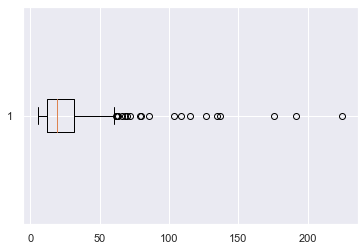

In [42]:
plt.boxplot(erp_web_nonull_sales['price'], vert=False)

In [49]:
sorted_price_nonull = erp_web_nonull_sales.sort_values(by=['price'])
q1, q3 = np.percentile(sorted_price_nonull["price"],[25,75])
iqr = q3 - q1
print("Q1 => " + str(q1))
print("Q3 => " + str(q3))
print("IQR => " + str(iqr))
upper_bound = q3 + (1.5 * iqr)
print("Upper_bound => " + str(upper_bound))
result = sorted_price_nonull[(sorted_price_nonull["price"] > upper_bound) | (sorted_price_nonull["price"] < lower_bound)]
print("Outliers => " + str(len(result)))
result['price']

Q1 => 12.5
Q3 => 31.7
IQR => 19.2
Upper_bound => 60.5
Outliers => 20


229     61.6
257     62.4
217     62.5
510     63.4
491     65.9
676     68.3
182     69.8
18      71.6
200     79.5
10      80.0
205     85.6
222    104.0
219    108.5
653    115.0
201    126.5
642    135.0
381    137.0
218    176.0
587    191.3
199    225.0
Name: price, dtype: float64

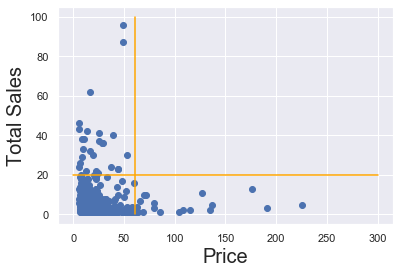

In [50]:
x = erp_web_nonull_sales['price']
y = erp_web_nonull_sales['total_sales']
plt.scatter(x,y)
plt.ylabel('Total Sales',fontsize=20)
plt.xlabel('Price',fontsize=20)
plt.plot([0, 300], [20, 20], c='orange')
plt.plot([60.5, 60.5], [0, 100], c='orange')
plt.show()

In [48]:
rslt_df = erp_web.loc[erp_web['price'] >= 85.6]
  
rslt_df.sort_values(by=['price'], ascending=False)

,product_id,sku,onsale_web,price,stock_quantity,stock_status,total_sales,post_name,CA
199,4352,15940,1,225.0,0,outofstock,5.0,champagne-egly-ouriet-grand-cru-millesime-2008,1125.0
426,5001,14581,1,217.5,20,instock,0.0,david-duband-charmes-chambertin-grand-cru-2014,0.0
587,5892,14983,1,191.3,10,instock,3.0,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,573.9
218,4402,3510,1,176.0,8,instock,13.0,cognac-frapin-vip-xo,2288.0
553,5767,15185,1,175.0,12,instock,0.0,camille-giroud-clos-de-vougeot-2016,0.0
221,4406,7819,1,157.0,3,instock,0.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans,0.0
381,4904,14220,1,137.0,13,instock,5.0,domaine-des-croix-corton-charlemagne-grand-cru...,685.0
642,6126,14923,1,135.0,10,instock,2.0,champagne-gosset-celebris-vintage-2007,270.0
201,4355,12589,1,126.5,2,instock,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,1391.5
511,5612,14915,1,124.8,12,instock,0.0,domaine-weinbach-gewurztraminer-gc-furstentum-...,0.0


In [45]:
#Price comparison
# 356€ https://www.enviedechamp.com/en/egly-ouriet-champagne/2444-grand-cru-millesime-2008.html
# 199€ https://www.millesima.fr/david-duband-charmes-chambertin-grand-cru-2014.html?gclid=Cj0KCQjwqKuKBhCxARIsACf4XuHusp195jlE2GAoPEiHO6gwslX4HyFZB2bLynFwLzeLIdf8Ly4uqnsaArWdEALw_wcB
# 189,95€ https://www.plus-de-bulles.com/fr/egly-ouriet/coteaux-ambonnay-rouge-2018.html?gclid=Cj0KCQjwqKuKBhCxARIsACf4XuHrj4XvWN_XubNgsBCRXCGlsLGe6uAbGVYt117EHChaitkEFkzsQ80aAj-aEALw_wcB